In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats as stats

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import  r2_score
from sklearn.preprocessing import PowerTransformer

In [3]:
df = pd.read_csv('concrete_data.csv')

In [4]:
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [5]:
df.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [6]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [7]:
x = df.drop(columns=['Strength'])
y = df.iloc[:,-1]

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [9]:
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
print("R^2 score:", r2_score(y_test, y_pred))

R^2 score: 0.6275531792314848


In [10]:
#cross checking the model
np.mean(cross_val_score(lr, x, y, scoring='r2'))

np.float64(0.4609940491662864)

Plotting the distplots without any transformation


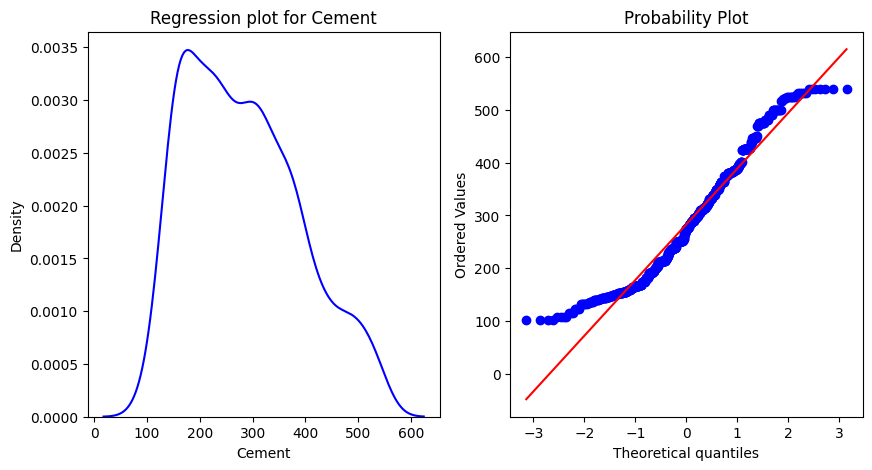

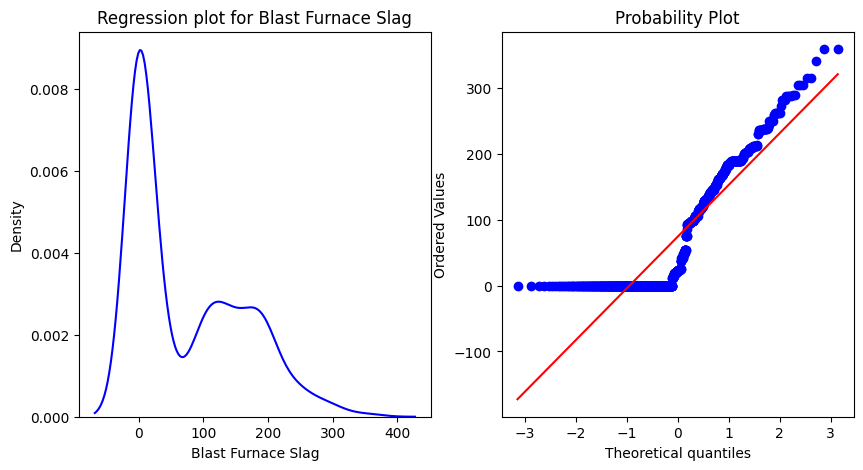

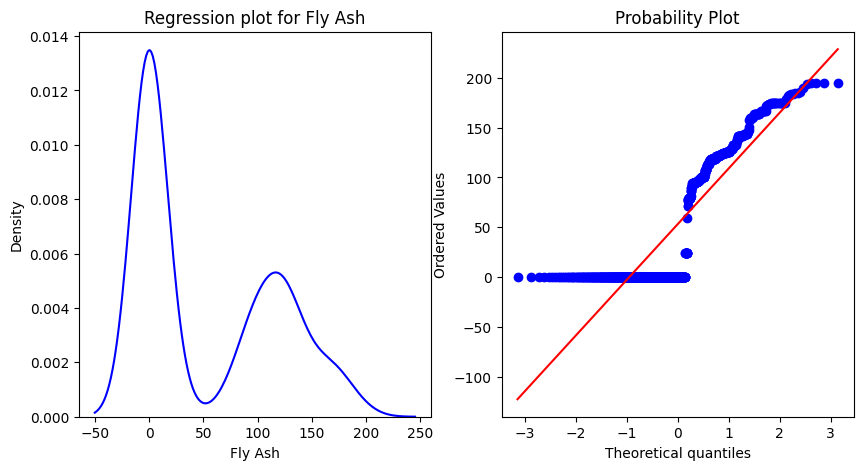

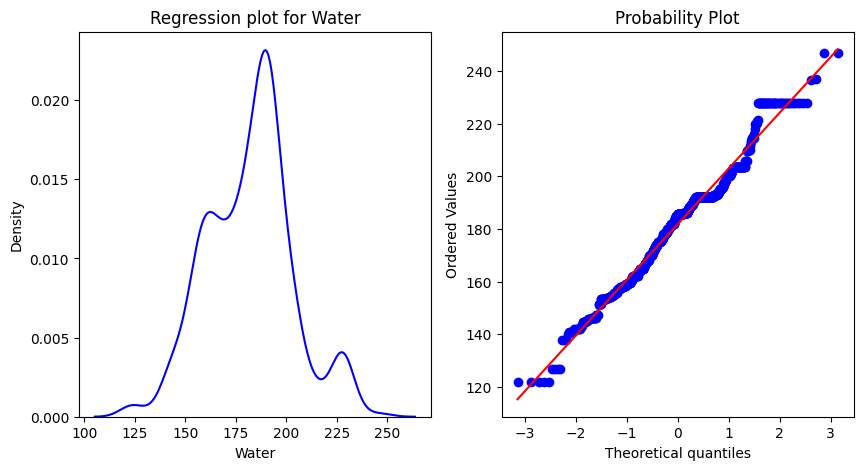

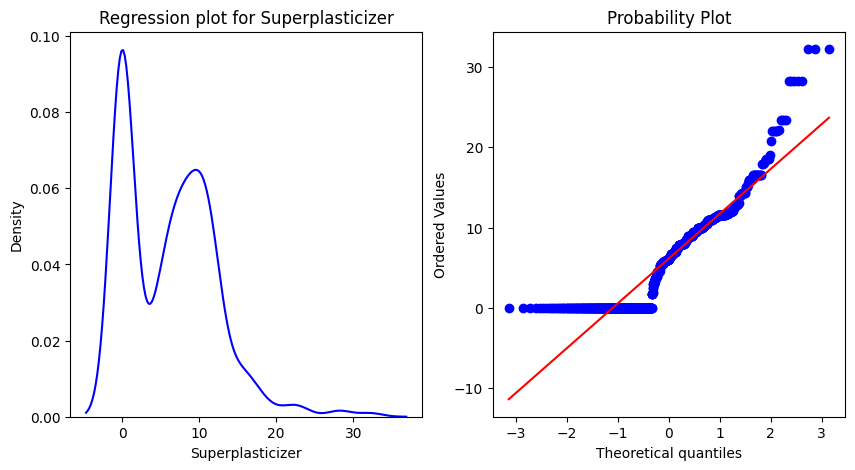

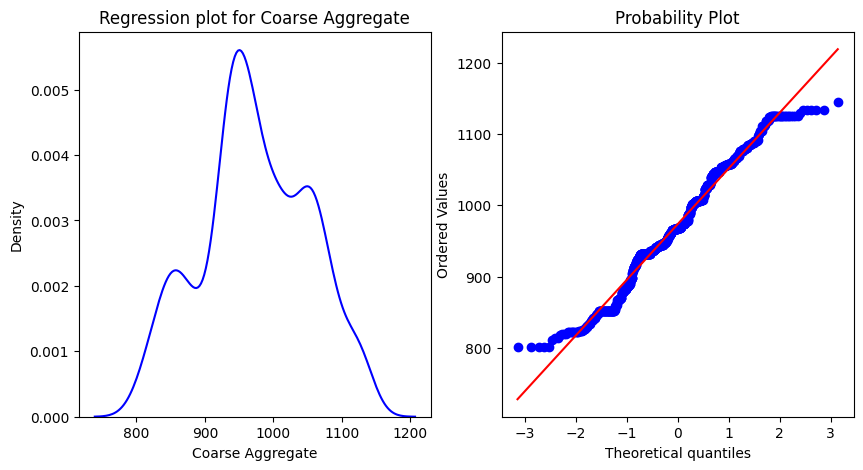

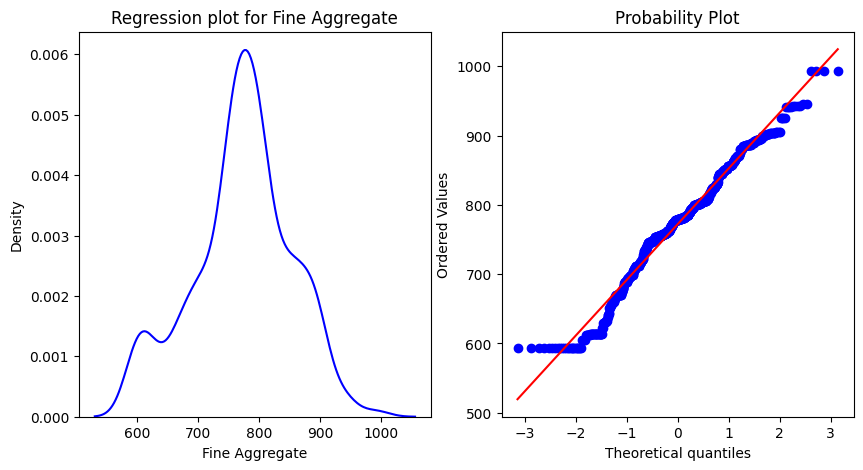

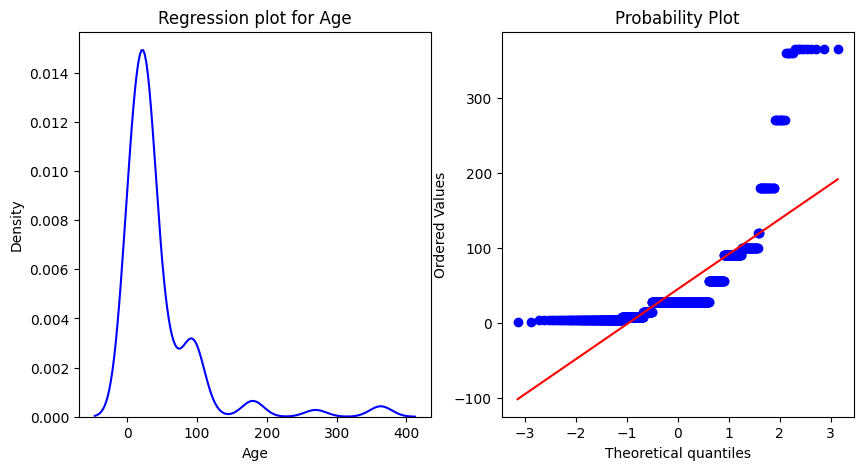

In [12]:
for i in x_train.columns:
    plt.figure(figsize=(10, 5))
    plt.subplot(121)
    sns.kdeplot(x_train[i], color='blue')
    plt.title(f'Regression plot for {i}')
    plt.subplot(122)
    stats.probplot(x_train[i], dist='norm', plot=plt)
    plt.show()

# Applying Box-Cox Transform


In [14]:
pt = PowerTransformer(method='box-cox')

x_trained_transformed = pt.fit_transform(x_train+0.000001)  # Adding a small constant to avoid issues with zero values
x_test_transformed = pt.transform(x_test+0.000001)

pd.DataFrame({'cols': x_train.columns, 'lambda': pt.lambdas_})

,cols,lambda
0,Cement,0.177025
1,Blast Furnace Slag,0.025093
2,Fly Ash,-0.038970
3,Water,0.772682
4,Superplasticizer,0.098811
5,Coarse Aggregate,1.129813
6,Fine Aggregate,1.782018
7,Age,0.066631


# Applying linear regression on transformed data


In [15]:
lr = LinearRegression()
lr.fit(x_trained_transformed, y_train)
y_pred2 = lr.predict(x_test_transformed)
print("R^2 score after transformation:", r2_score(y_test, y_pred2))

R^2 score after transformation: 0.8047825011028632


In [16]:
x_transformed = pt.fit_transform(x + 0.000001)

np.mean(cross_val_score(lr, x_transformed, y, scoring='r2'))

np.float64(0.6662950327179041)